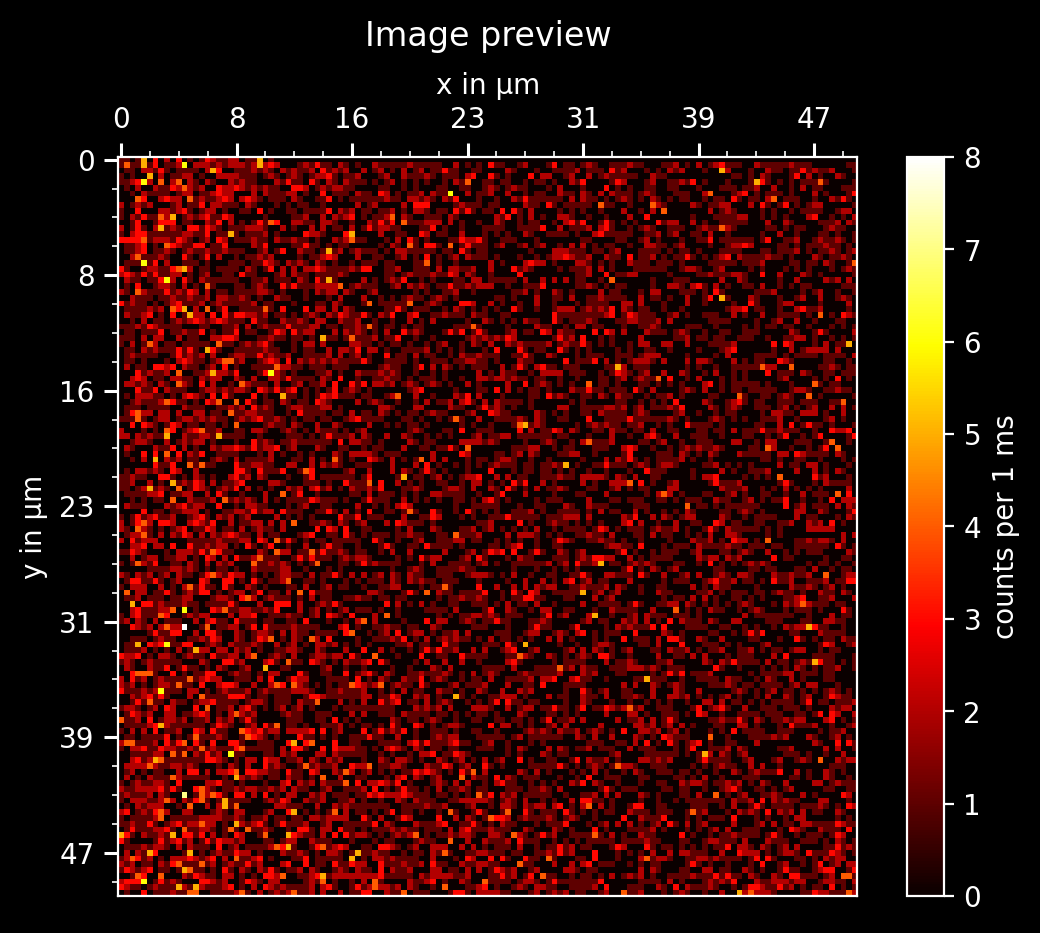

Data (arrays) in image file:
  - preview : (128, 128), int64
  -    APD1 : (128, 128), int64
  -    APD2 : (128, 128), int64




In [1]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show, curdoc

from modules import load, plot, analyze

img = load.image('/Users/kappel/Downloads/test_scan_image_parameters.img')
img.preview()



#fida_results = analyze.fida(test_img)
#plot.preview(fida_results)


In [1]:
vertical = img.data['APD1']
horizontal = img.data['APD2']

#diff = vertical - horizontal
diff = horizontal - vertical

NameError: name 'img' is not defined

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(diff, cmap='bwr', vmin=-30, vmax=30)
cbar = fig.colorbar(im, label='diff')
    
# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

plt.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
set_matplotlib_formats('retina')
ax.xaxis.set_label_position('top')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
detector1 = vertical
detector2 = horizontal

# threshold
threshold = 8

# Compute the result image based on the two detectors
result = np.zeros((128, 128, 3))
result[:, :, 0] = np.where(horizontal < threshold, 0, horizontal) * 255  # Red channel
result[:, :, 1] = np.where(vertical < threshold, 0, vertical) * 255  # Green channel
result[:, :, 2] = np.logical_and( horizontal >= threshold, vertical >= threshold) * 255  # Yellow channel

# Plot the resulting image
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(result.astype(np.uint8))
ax.set_axis_off()
plt.show()